#  [Statistics]  Simple Linear Regression - (5) Confidence Interval Band

#### Overview

< Introduction >

Regression model is based on the sample and it is an estimates. Regression model is not deterministic of population. It is not that simple. 

- A confidence band is used in statistical analysis to represent the uncertainty in an estimate of a curve or function based on limited or noisy data.

< Confidence Interval Band >

A confidence band is like a confidence interval.

- Confidence Interval Band: The lines on a probability plot or fitted line plot which show the upper and lower confidence bounds for all points on a fitted line within the range of data.

 In regression, at some desired level of confidence, the confidence band will show the plausible range of values for the fitted line. The confidence bands above and below the fitted line represent confidence intervals for the mean response for some predictor variable.
 
 The 95% confidence interval is commonly interpreted as there is a 95% probability that the true linear regression line of the population will lie within the confidence interval of the regression line calculated from the sample data.

#### Import library

In [72]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import library for linear regression

import statsmodels.api as sm

%matplotlib inline

#### Create Dataset

In [73]:
# create dataset and assign x and y
# we create an artificial data of bills(independent variable) and tips given(dependent variable)

x = [34, 108, 64, 88, 99 ,51] 
y = [5, 17, 11, 8, 14, 5]
df = pd.DataFrame({"bills" : x, "tips" : y})
x = df.bills
y = df.tips
df

,bills,tips
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14
5,51,5


#### Parameter for linear regression

In [74]:
# line slope (b1) and y-intercept (b0)

b0 = -0.8188
b1 = 0.1462

# Print linear regression equation
print(f'The linear regression is y = {b0} + {b1}x')

The linear regression is y = -0.8188 + 0.1462x


In [75]:
# calculation needed for confidence interval band 

x = [34, 108, 64, 88, 99 ,51] 
y = [5, 17, 11, 8, 14, 5]
df = pd.DataFrame({"x" : x, "y" : y})
df['x-x̄'] = df['x'] - np.mean(df['x'])
df['y-ȳ'] = df['y'] - np.mean(df['y'])
df['(x-x̄)(y-ȳ)'] = df['x-x̄'] * df['y-ȳ']
df['(x-x̄)^2'] = df['x-x̄']**2
df['(y-ȳ)^2'] = df['y-ȳ']**2
df['ŷ'] = b0 + b1 * df['x']
df['(y-ŷ)^2'] = (df['y'] - (b0 + b1 * df['x'])) ** 2
df['(ŷ-ȳ)^2'] = ((b0 + b1 * df['x']) - np.mean(df['y'])) ** 2
df

,x,y,x-x̄,y-ȳ,(x-x̄)(y-ȳ),(x-x̄)^2,(y-ȳ)^2,ŷ,(y-ŷ)^2,(ŷ-ȳ)^2
0,34,5,-40.0,-5.0,200.0,1600.0,25.0,4.1520,0.719104,34.199104
1,108,17,34.0,7.0,238.0,1156.0,49.0,14.9708,4.117653,24.708853
2,64,11,-10.0,1.0,-10.0,100.0,1.0,8.5380,6.061444,2.137444
3,88,8,14.0,-2.0,-28.0,196.0,4.0,12.0468,16.376590,4.189390
4,99,14,25.0,4.0,100.0,625.0,16.0,13.6550,0.119025,13.359025
5,51,5,-23.0,-5.0,115.0,529.0,25.0,6.6374,2.681079,11.307079


#### Confidence Interval Band



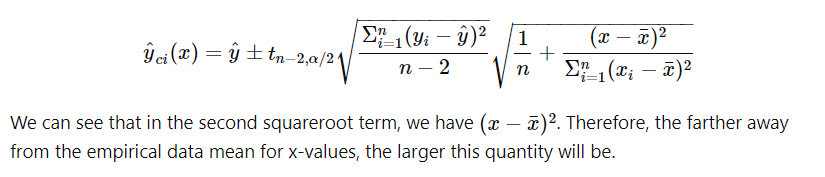

According to our example below, for a meal of 64 dollars, a tip of $8.54 is is just one of many possible tips.

In [76]:
meal = 64
tips =  -0.8188 + 0.1462 * meal
print(f'Tips is ${tips}')

Tips is $8.538


#### Calculate the interval band
 confidence interval band for 95% confidence level

In [77]:
# alpha value (upper tail probability ) and n-value (degree of freedom)
alpha = 0.05
n = len(x) - 2

# t-value is based on t-distribution with df = n-2
from scipy import stats
t_value = round(stats.t.ppf(1-alpha/2, n),4)

print(f't-value is {t_value}')

t-value is 2.7764


In [78]:
# root mean squared error, s

s = round((df['(y-ŷ)^2'].sum() / (len(x)-2)) ** 0.5,4)
print(f'Root mean squared error is {s}')

Root mean squared error is 2.742


In [79]:
# standard deviation of ŷ

sŷ = s * ((1/n) + (df['x']-np.mean(df['x'])) / np.sum(df['x']-np.mean(df['x'])))

In [80]:
# standard deviation of ŷ and confidence level band

x = [34, 108, 64, 88, 99 ,51] 
y = [5, 17, 11, 8, 14, 5]
df = pd.DataFrame({"x" : x, "y" : y})
df['ŷ'] = b0 + b1 * df['x']
df['sŷ'] = s * (1/len(x) + (df['x']-np.mean(df['x'])) ** 2 / np.sum((df['x']-np.mean(df['x'])) ** 2)) ** 0.5
df['CL_low'] = df['ŷ'] - t_value * df['sŷ']
df['CL_high'] = df['ŷ'] + t_value * df['sŷ']
df

,x,y,ŷ,sŷ,CL_low,CL_high
0,34,5,4.1520,2.028108,-1.478840,9.782840
1,108,17,14.9708,1.821960,9.912311,20.029289
2,64,11,8.5380,1.196600,5.215759,11.860241
3,88,8,12.0468,1.266278,8.531106,15.562494
4,99,14,13.6550,1.539588,9.380487,17.929513
5,51,5,6.6374,1.482810,2.520528,10.754272


#### Confidence Interval Band

for value of independent variable, x_ from 0 to 200

In [126]:
# predicted value
x_ = np.arange(0,200,1)
ŷ = []

for i in x_:
    ŷ.append(b0 + b1 * i)

# standard deviation of ŷ
sy = []
for i in x_:
    sy.append(s * (1/len(x) + ( i - np.mean(df['x'])) ** 2 / np.sum((df['x']-np.mean(df['x'])) ** 2)) ** 0.5)
    
# confidence interval band

CL_upper = []
CL_lower = []
for i in range(0,200):
    CL_upper.append(ŷ[i] + t_value * sy[i])
    CL_lower.append(ŷ[i] - t_value * sy[i])

pd.DataFrame({'Independence Variable' : x_ , 
              'Predicted Output': ŷ, 
              'Lower Confidence Level Band': CL_lower, 
              'Upper Confidence Level Band' : CL_upper})

,Independence Variable,Predicted Output,Lower Confidence Level Band,Upper Confidence Level Band
0,0,-0.8188,-10.044592,8.406992
1,1,-0.6726,-9.787953,8.442753
2,2,-0.5264,-9.531491,8.478691
3,3,-0.3802,-9.275210,8.514810
4,4,-0.2340,-9.019119,8.551119
...,...,...,...,...
195,195,27.6902,13.150487,42.229913
196,196,27.8364,13.181993,42.490807
197,197,27.9826,13.213457,42.751743
198,198,28.1288,13.244879,43.012721


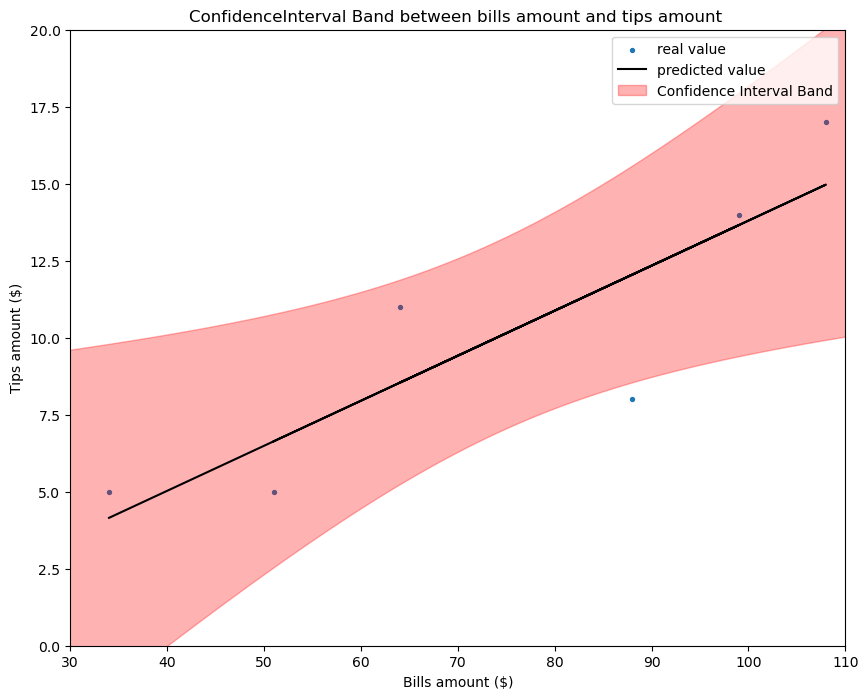

In [131]:
# plot linear regression

plt.figure(figsize = (10,8))
plt.scatter(df['x'], df['y'], s = 8, label = "real value")
plt.plot(df['x'] , df['ŷ'],color = "black", label = "predicted value")
plt.fill_between(x_, CL_upper, CL_lower, color = "red", alpha = 0.3,  label = "Confidence Interval Band")
plt.xlabel("Bills amount ($)")
plt.ylabel("Tips amount ($)")
plt.title("ConfidenceInterval Band between bills amount and tips amount ")
ax = plt.gca()
ax.set_xlim([30,110])
ax.set_ylim([0,20])
plt.legend()

#### Confidence Interval Band using seaborn

Text(0.5, 1.0, 'Linear Regression: Confidence Interval Band')

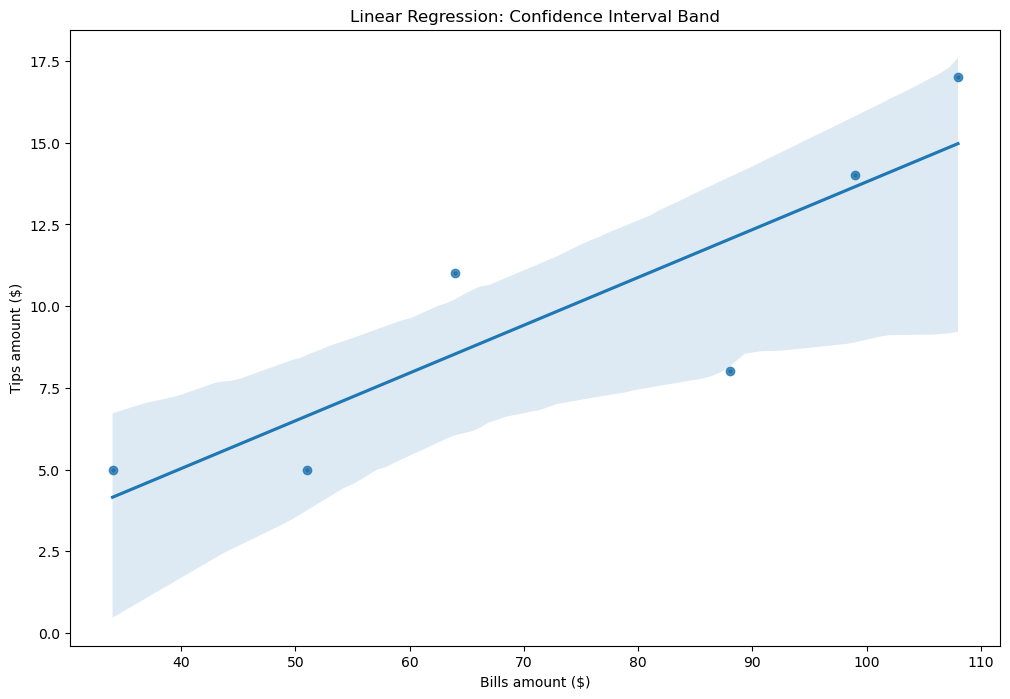

In [156]:
x = [34, 108, 64, 88, 99 ,51] 
y = [5, 17, 11, 8, 14, 5]

data = pd.DataFrame({'x': x,
                     'y': y})

plt.figure(figsize = (12,8))
plt.scatter(x, y, color = 'black',s = 5, alpha = 0.5)
sns.regplot(x = 'x', y = 'y', data = data,  ci = 95)
plt.xlabel("Bills amount ($)")
plt.ylabel("Tips amount ($)")
plt.title('Linear Regression: Confidence Interval Band')